In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from bs4 import BeautifulSoup
import scipy.stats as stats
import seaborn as sns

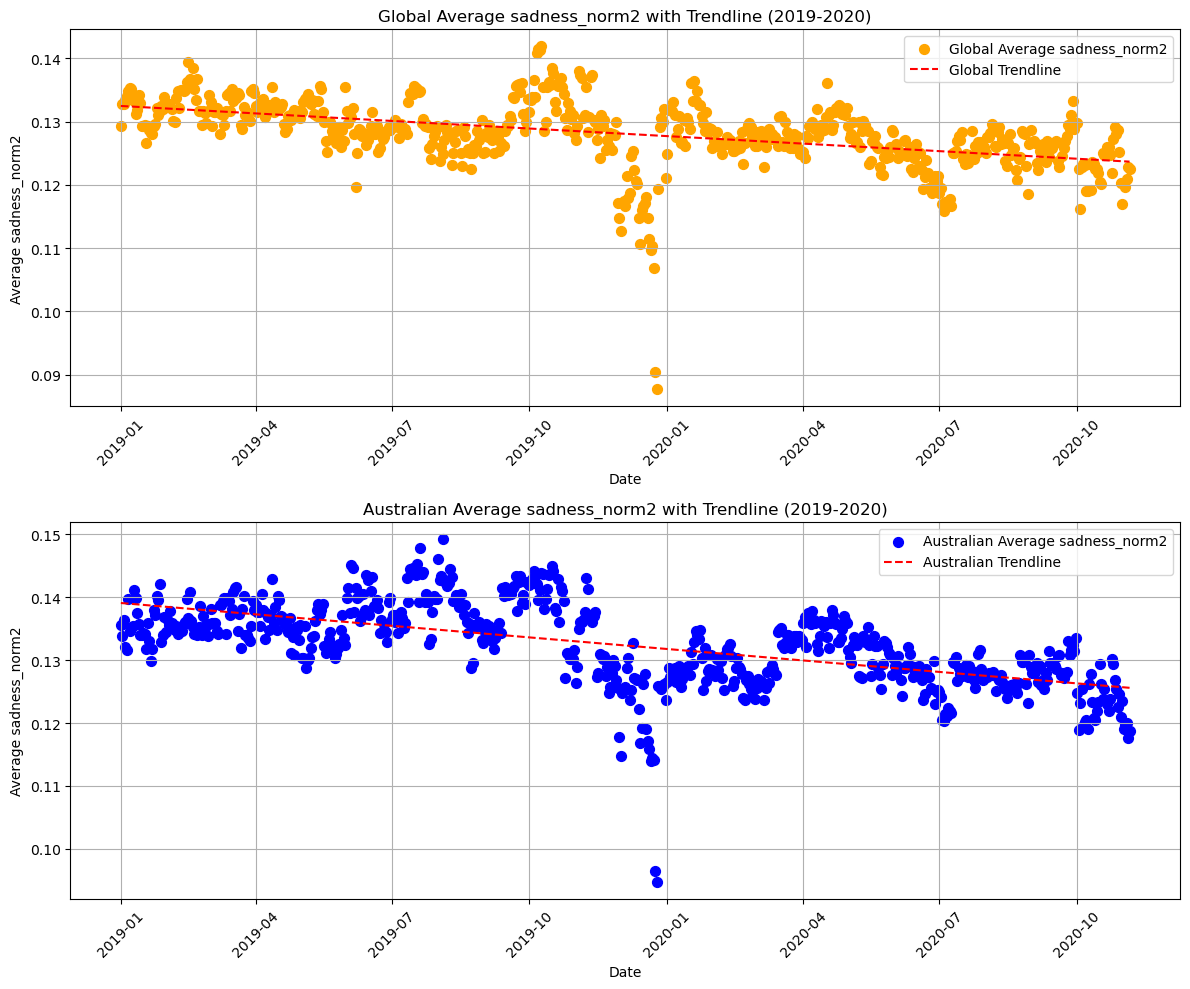

In [2]:
aus_daily_ranks=pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/Project 1 refined/aus_daily_ranks.csv')
global_daily_ranks=pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/Project 1 refined/global_daily_ranks.csv')





# data cleaning the popularity and sadness_norm2 rankings
global_daily_ranks['popularity'] = pd.to_numeric(global_daily_ranks['popularity'], errors='coerce')
aus_daily_ranks['popularity'] = pd.to_numeric(aus_daily_ranks['popularity'], errors='coerce')
global_daily_ranks['sadness_norm2'] = pd.to_numeric(global_daily_ranks['sadness_norm2'], errors='coerce')
aus_daily_ranks['sadness_norm2'] = pd.to_numeric(aus_daily_ranks['sadness_norm2'], errors='coerce')

# change the date format for uniformity 
global_daily_ranks['date'] = pd.to_datetime(global_daily_ranks['date'], format='%d/%m/%Y')
aus_daily_ranks['date'] = pd.to_datetime(aus_daily_ranks['date'], format='%d/%m/%Y')

# Filter data for the period from the start of 2019 to the end of 2020
start_date = '2019-01-01'
end_date = '2020-12-31'

global_avg_sadness_norm2 = global_daily_ranks[(global_daily_ranks['date'] >= start_date) & (global_daily_ranks['date'] <= end_date)].groupby('date')['sadness_norm2'].mean().reset_index()
aus_avg_sadness_norm2 = aus_daily_ranks[(aus_daily_ranks['date'] >= start_date) & (aus_daily_ranks['date'] <= end_date)].groupby('date')['sadness_norm2'].mean().reset_index()

# Ensure 'sadness_norm2' column is numeric
global_avg_sadness_norm2['sadness_norm2'] = pd.to_numeric(global_avg_sadness_norm2['sadness_norm2'])
aus_avg_sadness_norm2['sadness_norm2'] = pd.to_numeric(aus_avg_sadness_norm2['sadness_norm2'])

# Create two separate plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the global average sadness_norm2 in orange with a trendline
ax1.scatter(global_avg_sadness_norm2['date'], global_avg_sadness_norm2['sadness_norm2'], color='orange', s=50, label='Global Average sadness_norm2')
z = np.polyfit(range(len(global_avg_sadness_norm2)), global_avg_sadness_norm2['sadness_norm2'], 1)
p = np.poly1d(z)
ax1.plot(global_avg_sadness_norm2['date'], p(range(len(global_avg_sadness_norm2))), "r--", label='Global Trendline')

ax1.set_xlabel('Date')
ax1.set_ylabel('Average sadness_norm2')
ax1.set_title('Global Average sadness_norm2 with Trendline (2019-2020)')
ax1.grid(True)
ax1.legend()

# Plot the Australian average sadness_norm2 in blue with a trendline
ax2.scatter(aus_avg_sadness_norm2['date'], aus_avg_sadness_norm2['sadness_norm2'], color='blue', s=50, label='Australian Average sadness_norm2')
z = np.polyfit(range(len(aus_avg_sadness_norm2)), aus_avg_sadness_norm2['sadness_norm2'], 1)
p = np.poly1d(z)
ax2.plot(aus_avg_sadness_norm2['date'], p(range(len(aus_avg_sadness_norm2))), "r--", label='Australian Trendline')

ax2.set_xlabel('Date')
ax2.set_ylabel('Average sadness_norm2')
ax2.set_title('Australian Average sadness_norm2 with Trendline (2019-2020)')
ax2.grid(True)
ax2.legend()

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


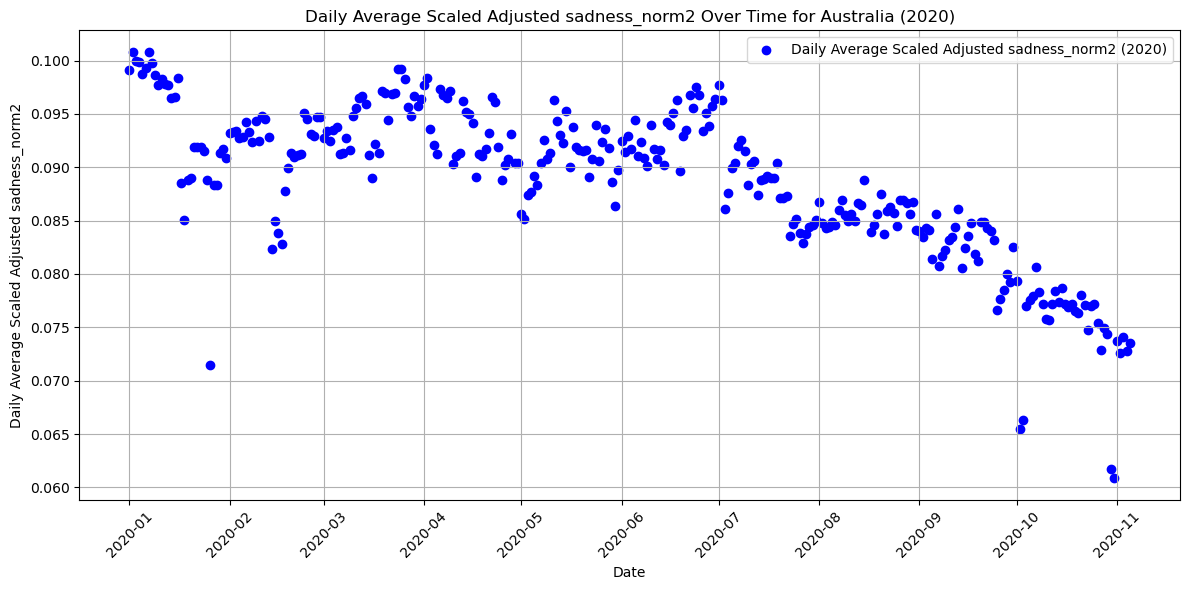

In [3]:
# calculate new adjusted sadness_norm2 by popularity, this is calculated by sadness_norm2 x popularity
global_daily_ranks['adjusted_sadness_norm2_popularity'] = global_daily_ranks['sadness_norm2'] * global_daily_ranks['popularity']
aus_daily_ranks['adjusted_sadness_norm2_popularity'] = aus_daily_ranks['sadness_norm2'] * aus_daily_ranks['popularity']

#normalising adjusted sadness_norm2 to have range from 0 to 1
min_val = aus_daily_ranks['adjusted_sadness_norm2_popularity'].min()
max_val = aus_daily_ranks['adjusted_sadness_norm2_popularity'].max()
aus_daily_ranks['scaled_adjusted_sadness_norm2'] = (aus_daily_ranks['adjusted_sadness_norm2_popularity'] - min_val) / (max_val - min_val)
aus_daily_ranks.tail()

# Calculate the baseline sadness_norm2

# Filter the dataset to the year 2019
start_date = pd.Timestamp("2019-01-01")
end_date = pd.Timestamp("2019-12-31")
data_2019 = aus_daily_ranks[(aus_daily_ranks["date"] >= start_date) & (aus_daily_ranks["date"] <= end_date)]


# Calculate the scaled_adjusted_sadness_norm2 for 2019
baseline_sadness_norm2_2019 = data_2019['scaled_adjusted_sadness_norm2'].mean()
baseline_sadness_norm2 = aus_daily_ranks['scaled_adjusted_sadness_norm2'].mean()



# Calculate the daily average of scaled_adjusted_sadness_norm2 for Australia
daily_avg_sadness_norm2 = aus_daily_ranks.groupby('date')['scaled_adjusted_sadness_norm2'].mean().reset_index()




# Filter data for the year 2020
start_date = '2020-01-01'
end_date = '2020-12-31'
data_2020 = aus_daily_ranks[(aus_daily_ranks['date'] >= start_date) & (aus_daily_ranks['date'] <= end_date)]

# Calculate the daily average of scaled_adjusted_sadness_norm2 for Australia in 2020
daily_avg_sadness_norm2_2020 = data_2020.groupby('date')['scaled_adjusted_sadness_norm2'].mean().reset_index()

# Create a line graph for the daily average of 'scaled_adjusted_sadness_norm2' in 2020
plt.figure(figsize=(12, 6))
plt.scatter(daily_avg_sadness_norm2_2020['date'], daily_avg_sadness_norm2_2020['scaled_adjusted_sadness_norm2'], color='blue', label='Daily Average Scaled Adjusted sadness_norm2 (2020)')
plt.xlabel('Date')
plt.ylabel('Daily Average Scaled Adjusted sadness_norm2')
plt.title('Daily Average Scaled Adjusted sadness_norm2 Over Time for Australia (2020)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


